In [27]:
! pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from category_encoders import TargetEncoder
from sklearn.metrics import mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

In [29]:
df=pd.read_csv('MLCarPrices.csv')
df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,saledate,sale_year,sale_month,sale_day,sale_dayofweek,Tight_condition,new_selling_price
0,2015,Kia,Sorento,LX,SUV,automatic,California,5.0,16639.0,white,black,kia motors america inc,20500.0,2014-12-16 04:30:00+00:00,2014,12,16,1,5,21500.0
1,2015,Kia,Sorento,LX,SUV,automatic,California,5.0,9393.0,white,beige,kia motors america inc,20800.0,2014-12-16 04:30:00+00:00,2014,12,16,1,5,21500.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,California,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,2015-01-14 20:30:00+00:00,2015,1,14,2,4,30000.0
3,2015,Volvo,S60,T5,Sedan,automatic,California,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,2015-01-28 20:30:00+00:00,2015,1,28,2,4,27750.0
4,2014,Chevrolet,Cruze,1LT,Sedan,automatic,California,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,2014-12-16 05:00:00+00:00,2014,12,16,1,2,9800.0


In [30]:
# capitalize all catigorical features
Categorical_col = df.select_dtypes(include= 'object').columns
df[Categorical_col] = df[Categorical_col].apply(lambda col: col.str.upper())
df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,saledate,sale_year,sale_month,sale_day,sale_dayofweek,Tight_condition,new_selling_price
0,2015,KIA,SORENTO,LX,SUV,AUTOMATIC,CALIFORNIA,5.0,16639.0,WHITE,BLACK,KIA MOTORS AMERICA INC,20500.0,2014-12-16 04:30:00+00:00,2014,12,16,1,5,21500.0
1,2015,KIA,SORENTO,LX,SUV,AUTOMATIC,CALIFORNIA,5.0,9393.0,WHITE,BEIGE,KIA MOTORS AMERICA INC,20800.0,2014-12-16 04:30:00+00:00,2014,12,16,1,5,21500.0
2,2014,BMW,3 SERIES,328I SULEV,SEDAN,AUTOMATIC,CALIFORNIA,45.0,1331.0,GRAY,BLACK,FINANCIAL SERVICES REMARKETING (LEASE),31900.0,2015-01-14 20:30:00+00:00,2015,1,14,2,4,30000.0
3,2015,VOLVO,S60,T5,SEDAN,AUTOMATIC,CALIFORNIA,41.0,14282.0,WHITE,BLACK,VOLVO NA REP/WORLD OMNI,27500.0,2015-01-28 20:30:00+00:00,2015,1,28,2,4,27750.0
4,2014,CHEVROLET,CRUZE,1LT,SEDAN,AUTOMATIC,CALIFORNIA,2.0,28617.0,BLACK,BLACK,ENTERPRISE VEHICLE EXCHANGE / TRA / RENTAL / T...,11900.0,2014-12-16 05:00:00+00:00,2014,12,16,1,2,9800.0


In [31]:
df.describe()

,year,condition,odometer,mmr,sale_year,sale_month,sale_day,sale_dayofweek,Tight_condition,new_selling_price
count,486820.000000,486820.000000,486820.000000,486820.000000,486820.000000,486820.000000,486820.000000,486820.000000,486820.000000,486820.000000
mean,2010.153059,31.121318,65805.684017,12850.804199,2014.923594,3.612929,14.545403,1.447124,3.466033,12795.929800
std,3.810079,12.968685,46313.181410,7429.344561,0.265647,3.027239,8.661010,1.241120,0.943190,7508.805538
min,1982.000000,1.000000,1.000000,25.000000,2014.000000,1.000000,1.000000,0.000000,1.000000,100.000000
25%,2008.000000,25.000000,29187.000000,7275.000000,2015.000000,1.000000,7.000000,1.000000,3.000000,7200.000000
50%,2012.000000,35.000000,52372.000000,12100.000000,2015.000000,2.000000,15.000000,1.000000,4.000000,12000.000000
75%,2013.000000,41.000000,97003.000000,17450.000000,2015.000000,6.000000,21.000000,2.000000,4.000000,17500.000000
max,2015.000000,49.000000,201485.000000,34900.000000,2015.000000,12.000000,31.000000,6.000000,5.000000,35000.000000


In [32]:
df.drop(columns=['condition','trim','saledate','sale_dayofweek'],axis=1,inplace=True)

In [33]:
df.rename(columns={'new_selling_price':'sell_price','Tight_condition':'condition'},inplace=True)

In [34]:
df['num_of_years'] = df.apply(lambda row: row['sale_year'] - row['year'] if row['sale_year'] - row['year']  >= 0 else 0, axis=1)


In [35]:
df.sample(5)

,year,make,model,body,transmission,state,odometer,color,interior,seller,mmr,sale_year,sale_month,sale_day,condition,sell_price,num_of_years
211398,2013,MERCEDES-BENZ,C-CLASS,SEDAN,AUTOMATIC,PENNSYLVANIA,18370.0,SILVER,BLACK,MERCEDES BENZ FINANCIAL SERVICES,25200.0,2015,2,5,3,23000.0,2
43665,2013,HYUNDAI,ELANTRA,SEDAN,AUTOMATIC,LOUISIANA,59294.0,WHITE,BEIGE,THE HERTZ CORPORATION,10100.0,2014,12,31,3,10100.0,1
183056,2008,HONDA,PILOT,SUV,AUTOMATIC,VIRGINIA,85788.0,RED,BEIGE,SPORTS AND IMPORTS INC,11400.0,2015,2,11,2,10000.0,7
43949,2013,NISSAN,ROGUE,SUV,AUTOMATIC,CALIFORNIA,11989.0,GRAY,BLACK,NISSAN INFINITI LT,15900.0,2015,1,13,4,16500.0,2
85733,2011,FORD,MUSTANG,COUPE,AUTOMATIC,GEORGIA,88298.0,WHITE,BLACK,FORD MOTOR CREDIT COMPANY LLC,14200.0,2015,1,13,4,14700.0,4


In [36]:
#find the corroleation
df.corr(numeric_only=True)

,year,odometer,mmr,sale_year,sale_month,sale_day,condition,sell_price,num_of_years
year,1.000000,-0.794424,0.664312,0.047513,0.013617,-0.013665,0.545336,0.658114,-0.997573
odometer,-0.794424,1.000000,-0.672026,-0.031241,-0.008015,0.007732,-0.545456,-0.670711,0.792943
mmr,0.664312,-0.672026,1.000000,0.037572,0.002117,-0.004023,0.515145,0.989896,-0.662262
sale_year,0.047513,-0.031241,0.037572,1.000000,-0.791871,-0.294278,0.031765,0.039155,0.022044
sale_month,0.013617,-0.008015,0.002117,-0.791871,1.000000,0.150628,-0.014298,-0.000733,-0.068756
sale_day,-0.013665,0.007732,-0.004023,-0.294278,0.150628,1.000000,-0.012681,-0.007419,-0.006816
condition,0.545336,-0.545456,0.515145,0.031765,-0.014298,-0.012681,1.000000,0.555872,-0.543585
sell_price,0.658114,-0.670711,0.989896,0.039155,-0.000733,-0.007419,0.555872,1.000000,-0.655948
num_of_years,-0.997573,0.792943,-0.662262,0.022044,-0.068756,-0.006816,-0.543585,-0.655948,1.000000


#data preprocessing

In [37]:
df_pre=df.drop(['seller','interior','sale_year','sale_day'],axis=1)
df_pre.head()

,year,make,model,body,transmission,state,odometer,color,mmr,sale_month,condition,sell_price,num_of_years
0,2015,KIA,SORENTO,SUV,AUTOMATIC,CALIFORNIA,16639.0,WHITE,20500.0,12,5,21500.0,0
1,2015,KIA,SORENTO,SUV,AUTOMATIC,CALIFORNIA,9393.0,WHITE,20800.0,12,5,21500.0,0
2,2014,BMW,3 SERIES,SEDAN,AUTOMATIC,CALIFORNIA,1331.0,GRAY,31900.0,1,4,30000.0,1
3,2015,VOLVO,S60,SEDAN,AUTOMATIC,CALIFORNIA,14282.0,WHITE,27500.0,1,4,27750.0,0
4,2014,CHEVROLET,CRUZE,SEDAN,AUTOMATIC,CALIFORNIA,28617.0,BLACK,11900.0,12,2,9800.0,0


In [38]:
x=df_pre.drop(columns=['sell_price','mmr'],axis=1)
y=df_pre['sell_price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [39]:
# Preprocessing pipeline
cat_features = ['make', 'model', 'body', 'state', 'color', 'transmission']
num_features = ['year', 'odometer', 'condition','sale_month','num_of_years']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', TargetEncoder(), cat_features)
    ], remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['year', 'odometer', 'condition', 'sale_month',
                                  'num_of_years']),
                                ('cat', TargetEncoder(),
                                 ['make', 'model', 'body', 'state', 'color',
                                  'transmission'])])

In [40]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNeighbors': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor()
}

for model_name, model in models.items():
    # Create pipeline for preprocessing and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    scores=cross_val_score(pipeline,x_train,y_train,cv=5)
    print(f'{model.__class__.__name__}: {scores.mean()}')


LinearRegression: 0.7577163484321983
Ridge: 0.7577163466242199
Lasso: 0.7577155652606961
DecisionTreeRegressor: 0.8845668576587483
KNeighborsRegressor: 0.7544132390509946
RandomForestRegressor: 0.9389131620160016


#features selcection


In [41]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(preprocessor.fit_transform(x_train,y_train), y_train)

# Get the feature importances
importances = rf.feature_importances_
feature_names = x_train.columns

In [42]:
# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df

#select top 10 features
top_10_features = feature_importance_df.nlargest(10, 'Importance')
# top_10_features['Feature'].values
x_train_selected = x_train[top_10_features['Feature'].values]
x_test_selected = x_test[top_10_features['Feature'].values]
x_train_selected.sample(5)


,year,odometer,make,state,color,sale_month,model,condition,body,transmission
483621,2000,112762.0,CHEVROLET,FLORIDA,SILVER,6,IMPALA,3,SEDAN,AUTOMATIC
156941,2014,14398.0,KIA,FLORIDA,GRAY,2,SPORTAGE,4,SUV,AUTOMATIC
20231,2013,13564.0,KIA,FLORIDA,RED,12,FORTE,4,SEDAN,AUTOMATIC
70416,2008,57975.0,HONDA,PENNSYLVANIA,GRAY,1,ACCORD,4,COUPE,AUTOMATIC
441047,2011,103775.0,FORD,TEXAS,RED,6,F-150,3,SUPERCREW,AUTOMATIC


<Axes: xlabel='Importance', ylabel='Feature'>

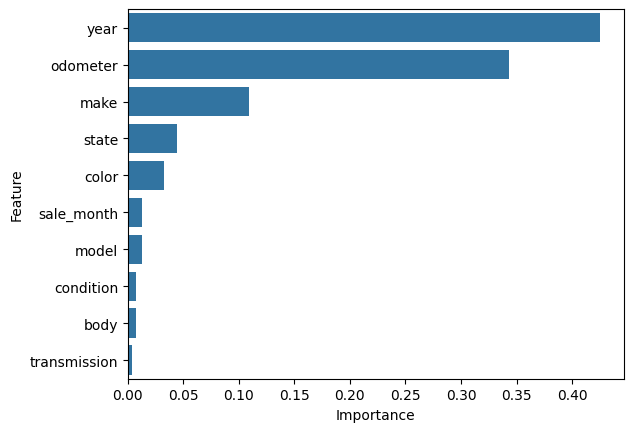

In [43]:
sns.barplot(x='Importance', y='Feature', data=top_10_features)

In [44]:
# Preprocessing pipeline after features selection
cat_features = ['make', 'model', 'body', 'state', 'color', 'transmission']
num_features = ['year', 'odometer', 'condition','sale_month']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', TargetEncoder(), cat_features)
    ], remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['year', 'odometer', 'condition',
                                  'sale_month']),
                                ('cat', TargetEncoder(),
                                 ['make', 'model', 'body', 'state', 'color',
                                  'transmission'])])

#Hyperparameter Tuning

In [45]:
lr_regressor = LinearRegression()
ridge_regressor = Ridge()
lasso_regressor = Lasso()
dt_regressor = DecisionTreeRegressor()
knn_regressor = KNeighborsRegressor()
rf_regressor = RandomForestRegressor()

# Parameter grid for hyperparameter tuning
param_grid = [
    # Linear Regression (No hyperparameters to tune)
    {
        'model': [LinearRegression()]
    },
    # Ridge Regression
    {
        'model': [Ridge()],
        'model__alpha': [0.1, 1.0]
    },
    # Lasso Regression
    {
        'model': [Lasso()],
        'model__alpha': [0.1, 1.0]
    },
    # Decision Tree Regressor
    {
        'model': [DecisionTreeRegressor()],
        'model__max_depth': [10, 20],
        'model__min_samples_split': [2, 10],
        'model__min_samples_leaf': [1, 5]
    },
    # KNeighbors Regressor
    {
        'model': [KNeighborsRegressor()],
        'model__n_neighbors': [5, 10],
        'model__weights': ['uniform', 'distance']
    },
    # Random Forest Regressor
    {
        'model': [RandomForestRegressor()],
        'model__n_estimators': [100, 200],
        'model__max_depth': [10, 20],
        'model__min_samples_split': [2, 10],
        'model__min_samples_leaf': [1, 5]
    }
]

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', lr_regressor)  # Placeholder model
])

In [46]:
# Run GridSearchCV to test different models and hyperparameters
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(x_train_selected, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['year',
                                                                          'odometer',
                                                                          'condition',
                                                                          'sale_month']),
                                                                        ('cat',
                                                                         TargetEncoder(),
                                                                         ['make',
                                                                          'model',
                                                                          'body',
                                                                          'state',
                                                                          'color',
                                                                          'transmission'])])),
                                       ('model', LinearRegression())]),
             n_jobs=-1,
             param_grid=[{'model': [LinearRegression()]...
                          'model__min_samples_leaf': [1, 5],
                          'model__min_samples_split': [2, 10]},
                         {'model': [KNeighborsRegressor()],
                          'model__n_neighbors': [5, 10],
                          'model__weights': ['uniform', 'distance']},
                         {'model': [RandomForestRegressor()],
                          'model__max_depth': [10, 20],
                          'model__min_samples_leaf': [1, 5],
                          'model__min_samples_split': [2, 10],
                          'model__n_estimators': [100, 200]}],
             scoring='neg_mean_squared_error')

In [78]:
# Best model from grid search
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(x_test_selected)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best model:", grid_search.best_params_)
print("Best model MSE:", mse)
print("Best model R²:", r2)

import pickle
# Save the best model
pickle.dump(best_model, open('car_price_prediction_model.pkl', 'wb'))
# pickle.dump(preprocessor, open('preprocessor.pkl', 'wb'))

# Example: Predicting the price for new data
new_data =pd.DataFrame({
    'year': [2022],
    'make': ['Ford'],
   'model': ['Mustang'],
    'trim': ['GT'],
    'body': ['SUV'],
    'transmission': ['Automatic'],
    'state': ['CA'],
    'odometer': [50000],
    'color': ['White'],
    'sale_month':[10],
    'condition': [4]
})

Best model: {'model': RandomForestRegressor(), 'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__n_estimators': 200}
Best model MSE: 3199820.1884884285
Best model R²: 0.9430090276654363


In [77]:

# Print the best hyperparameters and the best score

print("Best model:", grid_search.best_params_)
print("Best model MSE:", -grid_search.best_score_)


Best model: {'model': RandomForestRegressor(), 'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__n_estimators': 200}
Best model MSE: 3378877.261685143


In [79]:
model=pickle.load(open('car_price_prediction_model.pkl','rb'))

new_data = pd.DataFrame({
    'year': [2022],
    'make': ['Ford'],
    'model': ['Mustang'],
    'body': ['SUV'],
    'transmission': ['Automatic'],
    'state': ['CA'],
    'odometer': [50000],
    'color': ['White'],
    'sale_month':[10],
    'condition': [4]
})
pred=model.predict(new_data)
pred

array([14444.70192867])